# 4.10 InstaCart Basket 


## This script contains following points:
- Importing libraries, dataframes, observation of datasets
- 1. Creating regional segmentation of data: 
  -- creating new region column
  -- determining whether there’s a difference in spending habits between the different U.S. regions
  -- using crosstab to determine a difference in spending habits) 
  -- observation
- 2. Creating an exclusion flag for low-activity customers:
  -- creating df of the low activity customers 
  -- excluding low active customers from dataframe
- 3. Creating a profiling variable based on age, income, and number of dependents:
  -- creating a column for 'income profiling' in dataframe with loc function
  -- creating a column for 'age profiling' in dataframe with loc function
  -- creating a column for 'dependants profiling' in dataframe with loc function
- 4. Merging departments dataframe with insta dataframe
  -- renaming of a column in department dataframe
  -- merging dataframes on common column (department_id)
- 5. Creating 'Customer profile'
  -- creating column to show age and if customer has dependants or do not
- 6. Creating a visualization to show the distribution of profiles
  -- creating a pie-chart for customer profile proportion
- 7. Aggregate the max, mean, and min variables on a customer-profile:
  -- level for usage frequency
  -- level of expenditure
- 8. Comparing customer profiles by regions and departments
  -- 8.1 Creating stacked bar chart for customer profile by regions
  -- 8.2 Creating stacked bar chart for customer profile by departments
- 9. Producing suitable charts to illustrate results
  -- Creating bar chart to compare single, married, divorced/widowed, living with others shopping habits
  -- Classification based on age, income, family status
  -- Department sales by regions
  -- Creating chart spending habit by age and departments
  -- Order frequency by Loyalty 
  -- Order frequency by Region
  -- Comparing sales by departments based on family status
- Exporting dataframe
  
  

  
  

### Importing libraries, dataframe and running functions to get info about dataframe

In [136]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [137]:
# Path to the original data
path= r"/Users/mentaykoshzhanova/Desktop/Instacart Basket Analysis"
path


'/Users/mentaykoshzhanova/Desktop/Instacart Basket Analysis'

In [138]:
# Import last updated dataframe
ords_prods_customers_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [139]:
ords_prods_customers_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   add_to_cart_order       int64   
 3   reordered               int64   
 4   Unnamed: 0_x            int64   
 5   user_id                 int64   
 6   order_number            int64   
 7   order_day_of_week       int64   
 8   order_time              int64   
 9   days_since_prior_order  float64 
 10  _merge                  category
 11  Unnamed: 0_y            int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  exists                  category
 17  price_range_loc         object  
 18  price_ranged_loc        object  
 19  Busiest day             object  
 20  Busiest days            object  
 21  Busies

In [140]:
ords_prods_customers_merged.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0_x,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,...,order_frequency,First_name,Last_name,Gender,State,Age,Date_joined,Number_of_dependants,Marriage_status,Income
0,2,33120,1,1,3355525,202279,3,5,9,8.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
1,104690,33120,2,1,3355530,202279,8,6,10,30.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
2,132412,33120,1,1,3355528,202279,6,5,9,30.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
3,2808715,33120,1,1,3355527,202279,5,5,13,9.0,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
4,2894949,33120,5,0,3355523,202279,1,5,9,NaN,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119


In [148]:
ords_prods_customers_merged.drop(ords_prods_customers_merged.columns[[4, 10, 11, 13, 16, 18, 19, 33]], axis=1, inplace=True)

In [149]:
ords_prods_customers_merged.shape

(32434212, 29)

### 2. PII Data
PII data for this merged dataframe are 
- First and Last names
- Age
- Income
- Marital status
- Gender


## 3. Create a regional segmentation 
The Instacart officers are interested in comparing customer behavior in different geographic areas.  


#Creating new region column in df with loc for 4 regions, creating in separate cells

In [150]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['State'].str.contains(
'Maine|New Hampshire|Vermont|Massachusetts|Rhode Island|Connecticut|New York|Pennsylvania|New Jersey'), 
'Region'] = 'NorthEast'


In [151]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['State'].str.contains(
'Wisconsin|Michigan|Illinois|Indiana|Ohio|North Dakota|South Dakota|Nebraska|Kansas|Minnesota|Iowa|Missouri'), 
'Region'] = 'Midwest'


In [152]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['State'].str.contains(
'Delaware|Maryland|District of Columbia|Virginia|West Virginia|North Carolina|South Carolina|Georgia|Florida|Kentucky|Tennessee|Mississippi|Alabama|Oklahoma|Texas|Arkansas|Louisiana'),
'Region'] = 'South'


In [153]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['State'].str.contains(
'Idaho|Montana|Wyoming|Nevada|Utah|Colorado|Arizona|New Mexico|Alaska|Washington|Oregon|California|Hawaii'),
'Region'] = 'West'


In [154]:
# Checking df with head function to see the new region column
ords_prods_customers_merged.head(10)


,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,product_name,...,order_frequency,First_name,Last_name,Gender,State,Age,Number_of_dependants,Marriage_status,Income,Region
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
1,104690,33120,2,1,202279,8,6,10,30.0,Organic Egg Whites,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
2,132412,33120,1,1,202279,6,5,9,30.0,Organic Egg Whites,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
3,2808715,33120,1,1,202279,5,5,13,9.0,Organic Egg Whites,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
4,2894949,33120,5,0,202279,1,5,9,NaN,Organic Egg Whites,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
5,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
6,132412,28985,7,1,202279,6,5,9,30.0,Michigan Organic Kale,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
7,1500071,28985,1,1,202279,2,4,13,20.0,Michigan Organic Kale,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
8,2808715,28985,2,1,202279,5,5,13,9.0,Michigan Organic Kale,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West
9,2894949,28985,4,0,202279,1,5,9,NaN,Michigan Organic Kale,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,3,married,98119,West


### Determining whether there’s a difference in spending habits between the different U.S. regions

In [155]:
# Frequency check of the new column
ords_prods_customers_merged['Region'].value_counts(dropna=False)

South        10801610
West          8300445
Midwest       7603810
NorthEast     5728347
Name: Region, dtype: int64

In [156]:
# Use crosstab to determine a difference in spending habits
crosstab=pd.crosstab(index = ords_prods_customers_merged['Region'], columns = ords_prods_customers_merged['spending_habit'], dropna=False)
crosstab


spending_habit,High spender,Low spender
Region,,
Midwest,7596096,7714
NorthEast,5722788,5559
South,10791721,9889
West,8292022,8423


### Observation from crosstab
NorthEast has the smallest amount of low spenders, and South has the most amount of high spenders and also the most amount of low spenders. The prices were fixed before this notebook was created which explains why low spender amount is too low vs high spenders amount. High spender - 32402627, Low spender - 31585


## 4. Create an exclusion flag for low-active customers
Create an exclusion flag for low-activity customers (customers with less than 5 orders) with loc and exclude them from the data

In [157]:
# Create an exclusion flag for low-activity customers with less than 5 orders, and regular activity customers if >=5
ords_prods_customers_merged.loc[ords_prods_customers_merged['order_number'] < 5, 'Exclusion_flag'] = 'Low_active customer'
ords_prods_customers_merged.loc[ords_prods_customers_merged['order_number'] >= 5, 'Exclusion_flag'] = 'Regular_active customer'

In [158]:
# Frequency check of the new column
ords_prods_customers_merged['Exclusion_flag'].value_counts(dropna=False)

Regular_active customer    24436791
Low_active customer         7997421
Name: Exclusion_flag, dtype: int64

In [159]:
# Running head function to check the new column exclusion flag
ords_prods_customers_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,product_name,...,First_name,Last_name,Gender,State,Age,Number_of_dependants,Marriage_status,Income,Region,Exclusion_flag
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Low_active customer
1,104690,33120,2,1,202279,8,6,10,30.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer
2,132412,33120,1,1,202279,6,5,9,30.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer
3,2808715,33120,1,1,202279,5,5,13,9.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer
4,2894949,33120,5,0,202279,1,5,9,NaN,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Low_active customer


In [160]:
# Create df of the low activity customers and attach it to df
df_low_active = ords_prods_customers_merged[ords_prods_customers_merged['Exclusion_flag'] == 'Low_active customer']


In [161]:
# Checking row numbers before excluding low active customers from df
df_low_active.shape


(7997421, 31)

In [162]:
# Export df_low to the prepared data before excluding it
df_low_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_active_customers.pkl'))

In [163]:
# Excluding low active customers by creating a new df 
df_insta= ords_prods_customers_merged[ords_prods_customers_merged['Exclusion_flag'] == 'Regular_active customer']


In [164]:
# Checking row numbers after excluding and creating new df
df_insta.shape


(24436791, 31)

In [165]:
df_insta.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,product_name,...,First_name,Last_name,Gender,State,Age,Number_of_dependants,Marriage_status,Income,Region,Exclusion_flag
1,104690,33120,2,1,202279,8,6,10,30.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer
2,132412,33120,1,1,202279,6,5,9,30.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer
3,2808715,33120,1,1,202279,5,5,13,9.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer
6,132412,28985,7,1,202279,6,5,9,30.0,Michigan Organic Kale,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer
8,2808715,28985,2,1,202279,5,5,13,9.0,Michigan Organic Kale,...,Paul,Coleman,Male,Idaho,57,3,married,98119,West,Regular_active customer


## 5. Creating a profiling variable based on age, income, and number of dependents

## 5.1 Creating a column for income profiling

### Create a column for income profile to filter income as below:
- low_income - 20,000-44,999k
- middle_income - 45,000-69,999k
- high_income - 70,000-149,999k
- very_high_income - 150,000+


In [166]:
# Create new column income profile with loc
df_insta.loc[(df_insta['Income'] > 20000) & (df_insta['Income'] <= 44999), 'Income_profile'] = 'Low_income'
df_insta.loc[(df_insta['Income'] > 45000) & (df_insta['Income'] <= 69999), 'Income_profile'] = 'Middle_income'
df_insta.loc[(df_insta['Income'] > 70000) & (df_insta['Income'] <= 149999), 'Income_profile'] = 'High_income'
df_insta.loc[(df_insta['Income'] >= 150000), 'Income_profile'] = 'Very_high_income'


/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_5731/1139048389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insta.loc[(df_insta['Income'] > 20000) & (df_insta['Income'] <= 44999), 'Income_profile'] = 'Low_income'


In [167]:
# Frequency check of the new column
df_insta['Income_profile'].value_counts(dropna=False)


High_income         14670635
Middle_income        4733012
Very_high_income     3089732
Low_income           1943275
NaN                      137
Name: Income_profile, dtype: int64

#### There are 137 cells with null in income profile column which i decided to leave as it is, since they won't make a big difference in my analysis

## 5.2 Creating a column for age profiling

In [169]:
df_insta['Age'].min()

18

In [170]:
df_insta['Age'].mean()

49.457154010115325

In [171]:
df_insta['Age'].max()

81

### Create age profiling column as below for filtering:
- 18-30 yrs old - Young adult
- 31-60 yrs old - Middle aged
- 61+ yrs old - Older aged

In [172]:
# Create column age profile with loc
df_insta.loc[(df_insta['Age'] <= 30), 'Age_profile'] = 'Young adult'
df_insta.loc[(df_insta['Age'] >= 31) & (df_insta['Age'] <= 60), 'Age_profile'] = 'Middle aged'
df_insta.loc[(df_insta['Age'] >= 61), 'Age_profile'] = 'Older aged'

/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_5731/3957557158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insta.loc[(df_insta['Age'] <= 30), 'Age_profile'] = 'Young adult'


## 5.3 Creating a column of dependants profiling

In [174]:
# Create a column for number of dependants with loc
df_insta.loc[(df_insta['Number_of_dependants'] == 0), 'Dependants_profile'] = 'Has no dependants'
df_insta.loc[(df_insta['Number_of_dependants'] > 0), 'Dependants_profile'] = 'Has dependants'

/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_5731/934431527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insta.loc[(df_insta['Number_of_dependants'] == 0), 'Dependants_profile'] = 'Has no dependants'


In [175]:
# Frequency check of a new dependants profile column
df_insta['Dependants_profile'].value_counts(dropna=False)

Has dependants       18326004
Has no dependants     6110787
Name: Dependants_profile, dtype: int64

In [176]:
df_insta.shape

(24436791, 34)

# 5.4 Merge departments dataframe with insta dataframe

In [177]:
# Check departments df for a common column with insta df (department_id)
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [178]:
# rename column unnamed to department id to match insta column name
depts = departments.rename(columns={'Unnamed: 0': 'department_id'})

In [179]:
depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [180]:
depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [181]:
# Merge on department id column
df_merged = depts.merge(df_insta, on = 'department_id')

In [182]:
# Frequency check of a new column department
df_merged['department'].value_counts(dropna=False)

produce            7227091
dairy eggs         4132060
snacks             2187121
beverages          2036466
frozen             1628844
pantry             1385520
bakery              886698
canned goods        787790
deli                783011
dry goods pasta     633725
household           539349
breakfast           530401
meat seafood        523891
babies              335947
personal care       328569
international       197900
alcohol             108002
pets                 72115
missing              57567
bulk                 27558
other                27166
Name: department, dtype: int64

In [184]:
df_merged.shape

(24436791, 35)

# 5.5 Creating customer profile
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [185]:
df_merged['Age_profile'].value_counts(dropna=False)

Middle aged    11485653
Older aged      7975793
Young adult     4975345
Name: Age_profile, dtype: int64

#### With no dependants

In [186]:
# Create customer profile column with loc
df_merged.loc[(df_merged['Age_profile'] == 'Young adult') & 
              (df_merged['Dependants_profile'] == 'Has no dependants'), 'Customer_profile'] = 'Young adult has no dependants'

In [187]:
df_merged.loc[(df_merged['Age_profile'] == 'Middle aged') & 
              (df_merged['Dependants_profile'] == 'Has no dependants'), 'Customer_profile'] = 'Middle aged has no dependants'

In [188]:
df_merged.loc[(df_merged['Age_profile'] == 'Older aged') & 
              (df_merged['Dependants_profile'] == 'Has no dependants'), 'Customer_profile'] = 'Older aged has no dependants'

####  With dependants

In [189]:
# Create customer profile column with loc
df_merged.loc[(df_merged['Age_profile'] == 'Young adult') & 
              (df_merged['Dependants_profile'] == 'Has dependants'), 'Customer_profile'] = 'Young parent'

In [190]:
df_merged.loc[(df_merged['Age_profile'] == 'Middle aged') & 
              (df_merged['Dependants_profile'] == 'Has dependants'), 'Customer_profile'] = 'Middle aged parent'

In [191]:
df_merged.loc[(df_merged['Age_profile'] == 'Older aged') & 
              (df_merged['Dependants_profile'] == 'Has dependants'), 'Customer_profile'] = 'Older aged parent'

In [192]:
df_merged['Customer_profile'].value_counts(dropna=False)

Middle aged parent               8614690
Older aged parent                5973088
Young parent                     3738226
Middle aged has no dependants    2870963
Older aged has no dependants     2002705
Young adult has no dependants    1237119
Name: Customer_profile, dtype: int64

In [194]:
df_merged.head()

,department_id,department,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,...,Age,Number_of_dependants,Marriage_status,Income,Region,Exclusion_flag,Income_profile,Age_profile,Dependants_profile,Customer_profile
0,1,frozen,104690,20995,9,0,202279,8,6,10,...,57,3,married,98119,West,Regular_active customer,High_income,Middle aged,Has dependants,Middle aged parent
1,1,frozen,104690,42824,8,0,202279,8,6,10,...,57,3,married,98119,West,Regular_active customer,High_income,Middle aged,Has dependants,Middle aged parent
2,1,frozen,268999,40545,2,1,153404,17,4,11,...,62,0,divorced/widowed,136045,South,Regular_active customer,High_income,Older aged,Has no dependants,Older aged has no dependants
3,1,frozen,1017899,40545,5,1,153404,7,1,17,...,62,0,divorced/widowed,136045,South,Regular_active customer,High_income,Older aged,Has no dependants,Older aged has no dependants
4,1,frozen,1699739,40545,9,1,153404,27,5,13,...,62,0,divorced/widowed,136045,South,Regular_active customer,High_income,Older aged,Has no dependants,Older aged has no dependants


In [195]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24436791 entries, 0 to 24436790
Data columns (total 36 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   department_id           int64  
 1   department              object 
 2   order_id                int64  
 3   product_id              int64  
 4   add_to_cart_order       int64  
 5   reordered               int64  
 6   user_id                 int64  
 7   order_number            int64  
 8   order_day_of_week       int64  
 9   order_time              int64  
 10  days_since_prior_order  float64
 11  product_name            object 
 12  prices                  float64
 13  price_range_loc         object 
 14  Busiest days            object 
 15  Busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  average_price           float64
 19  spending_habit          object 
 20  frequency_median        float64
 21  order_frequency         objec

In [263]:
# Dropping first and last name, age columns (PII data)
df_merged.drop(df_merged.columns[[22, 23, 24]], axis =1, inplace = True)

In [264]:
df_merged.head()

,department_id,department,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,...,Age,Number_of_dependants,Marriage_status,Income,Region,Exclusion_flag,Income_profile,Age_profile,Dependants_profile,Customer_profile
0,1,frozen,104690,20995,9,0,202279,8,6,10,...,57,3,married,98119,West,Regular_active customer,High_income,Middle aged,Has dependants,Middle aged parent
1,1,frozen,104690,42824,8,0,202279,8,6,10,...,57,3,married,98119,West,Regular_active customer,High_income,Middle aged,Has dependants,Middle aged parent
2,1,frozen,268999,40545,2,1,153404,17,4,11,...,62,0,divorced/widowed,136045,South,Regular_active customer,High_income,Older aged,Has no dependants,Older aged has no dependants
3,1,frozen,1017899,40545,5,1,153404,7,1,17,...,62,0,divorced/widowed,136045,South,Regular_active customer,High_income,Older aged,Has no dependants,Older aged has no dependants
4,1,frozen,1699739,40545,9,1,153404,27,5,13,...,62,0,divorced/widowed,136045,South,Regular_active customer,High_income,Older aged,Has no dependants,Older aged has no dependants


## 6. Creating a visualization to show the distribution of profiles


### Creating a pie chart for the customer profile distribution

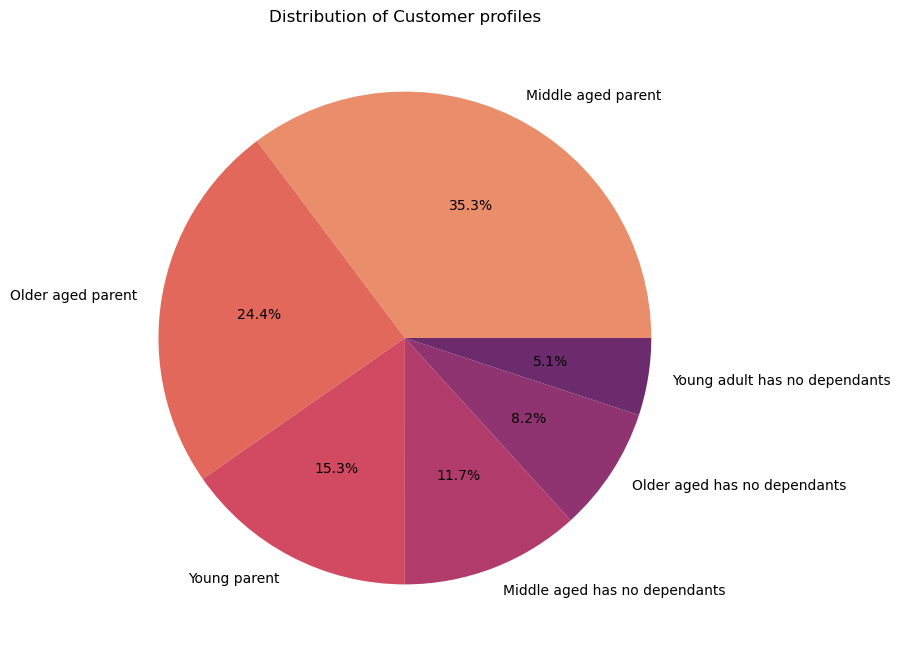

In [196]:
# Create a pie chart 
df_pie = df_merged['Customer_profile'].value_counts().plot.pie(figsize=(8,8), 
                                                               colors = sns.color_palette('flare', 6),
                                                               autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Customer profiles', fontsize = 12)
# show the plot
plt.show()


In [197]:
# Export pie as an image
df_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_pie.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [198]:
# Find the max, mean, min for the customer profile level of usage frequency
df_merged.groupby('Customer_profile').agg({'days_since_prior_order': ['max','mean', 'min']})

days_since_prior_order                
                                                 max       mean  min
Customer_profile                                                    
Middle aged has no dependants                   30.0  10.019284  0.0
Middle aged parent                              30.0  10.097422  0.0
Older aged has no dependants                    30.0  10.029198  0.0
Older aged parent                               30.0  10.086923  0.0
Young adult has no dependants                   30.0  10.220799  0.0
Young parent                                    30.0  10.090806  0.0

In [199]:
# Find the max, mean, min for the customer profile level of expenditure
df_merged.groupby('Customer_profile').agg({'average_price': ['max','mean', 'min']})

average_price                
                                        max       mean  min
Customer_profile                                           
Middle aged has no dependants          25.0  19.703619  1.0
Middle aged parent                     25.0  19.740172  1.0
Older aged has no dependants           25.0  19.788037  1.9
Older aged parent                      25.0  19.686147  1.3
Young adult has no dependants          25.0  19.721316  2.1
Young parent                           25.0  19.688271  1.7

## 8. Comparing customer profiles by regions and departments
Customers may demonstrate different behaviors across regions, which could make this information important.

### 8.1 Creating stacked bar chart for customer profile by regions

In [200]:
# Use crosstab to determine a difference in customer profile by regions
crosstab2=pd.crosstab(index = df_merged['Region'], columns = df_merged['Customer_profile'], normalize = 'index')

In [201]:
crosstab2

Customer_profile,Middle aged has no dependants,Middle aged parent,Older aged has no dependants,Older aged parent,Young adult has no dependants,Young parent
Region,,,,,,
Midwest,0.120734,0.354456,0.081990,0.241557,0.048872,0.152391
NorthEast,0.110374,0.354413,0.084647,0.246701,0.051811,0.152054
South,0.116824,0.350952,0.081503,0.244387,0.052431,0.153903
West,0.120282,0.351522,0.080652,0.245543,0.049062,0.152939


In [202]:
# Create a label of a crosstab to use in creation of a stacked bar
labels = pd.crosstab(index = df_merged['Region'], columns = df_merged['Customer_profile'])

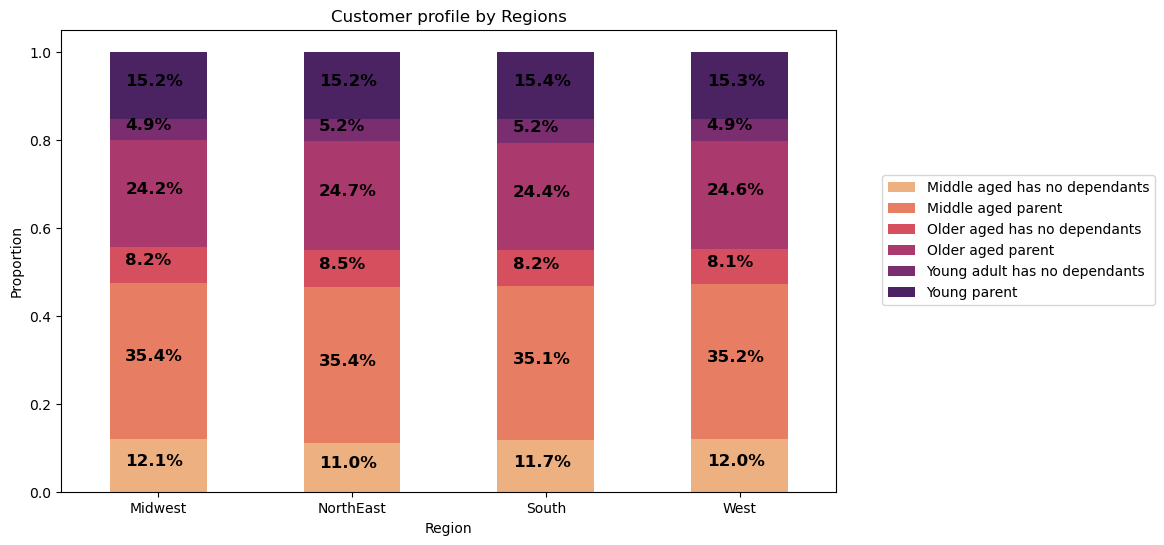

In [203]:
# Create a stacked bar chart

df_stacked = crosstab2.abs().plot(kind='bar', 
                               stacked=True,
                               colormap = 'flare',
                                  title='Customer profile by Regions',
                               figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 0.7),loc='upper left')
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.xticks(rotation = 0, fontsize=10)

for n, x in enumerate([*labels.index.values]):
    for (proportion, y_loc) in zip(crosstab2.loc[x],
                                   crosstab2.loc[x].cumsum()):
                
                 plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                fontweight= 'bold')

plt.show()

In [204]:
# Export stacked bar as an image
df_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_by_region.png'))

### Observation
Middle aged parent are the majority of customers in all 4 regions, followed by older aged parent. Young parents are third in the demographics of the chart, 15% in every region. From observing the stacked chart we can say that customers behavior is almost the same in all regions. 

### 8.2 Creating stacked bar chart for customer profile by departments

In [229]:
# Use crosstab to determine a difference in customer profile by departments
crosstab3=pd.crosstab(index = df_merged['department'], columns = df_merged['Customer_profile'], normalize = 'index')

In [230]:
# Create a label to use on a plot
label_dept=pd.crosstab(index = df_merged['department'], columns = df_merged['Customer_profile'])

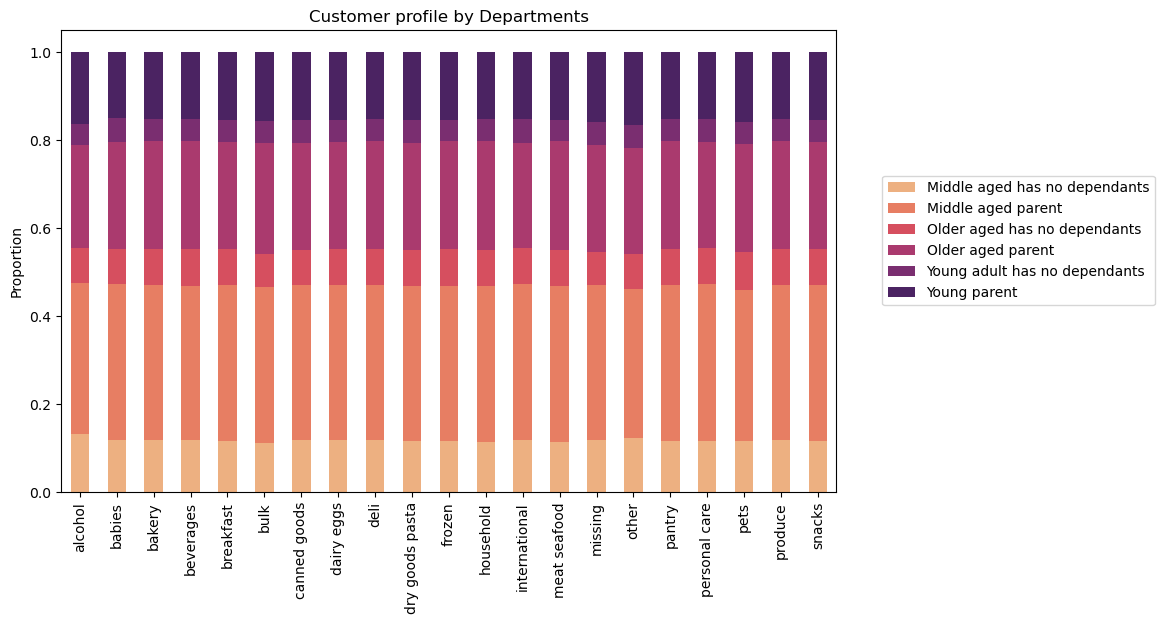

In [231]:
# Create a stacked bar chart
# create data
df_stacked_dept = crosstab3.abs().plot(kind='bar', 
                               stacked=True,
                               colormap = 'flare',
                                  title='Customer profile by Departments',
                               figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 0.7),loc='upper left')
plt.xlabel('')
plt.ylabel("Proportion")

plt.show()

In [232]:
# Export stacked bar as an image
df_stacked_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_by_departments.png'))

#### Observation
As we can see from the stacked chart middle aged parent are the majotiry of shoppers in every department, followed by older agent parents and young parents. From these 2 charts we see that people who has dependants shop more than people with no dependants, which makes sense. Unfortunately including proportions into chart made chart too busy. 


## 9. Producing suitable charts to illustrate results

#### Sales team vis list:
- 1. busiest days of the week (ex 9)
- 2. busiest hours of the day (ex 9)
- 3. most money spent time (ex 9)
- 4. price range grouping (
- 5. highest frequency of product orders by  department

#### Marketing team vis list:
- 1. Distribution among users (loyalty_flag)
- 2. Ordering habits based on customer's region
- 3. Connection between age and ordering habits
- 4. Connection between family status and ordering habits
- 5. Classification based on age, income, family status
- 6. Customer profile by region
- 7. Customer profile by department
- 8. Other insights

## Visualization for sales team

### Price range grouping

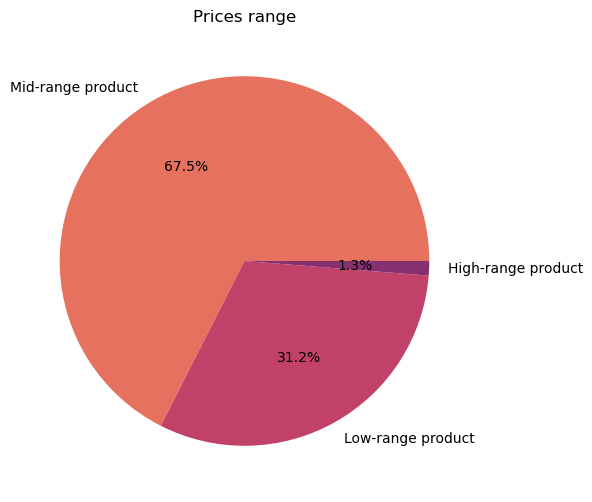

In [212]:
# Create a pie chart to visualize the distribution of price range
prices_pie = df_merged['price_range_loc'].value_counts().plot.pie(figsize = (8,6), 
                                                               colors = sns.color_palette('flare', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title ('Prices range')

plt.show()

In [213]:
# Export pie as an image
prices_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_pie.png'))

## Visualization for Marketing team

#### 1. Distribution among users
Using pie chart for the proportion of customers by their loyalty (more than 40 orders)

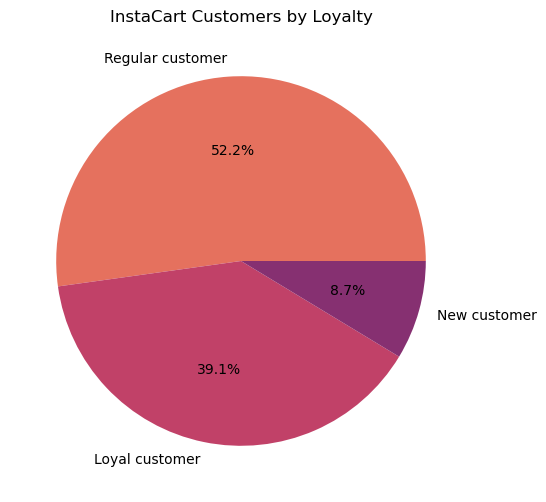

In [214]:
# Create a pie chart to visualize the distribution of customer loyalty
customers_pie = df_merged['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), 
                                                               colors = sns.color_palette('flare', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title ('InstaCart Customers by Loyalty')

plt.show()


In [215]:
# Export pie as an image
customers_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_customers_pie.png'))

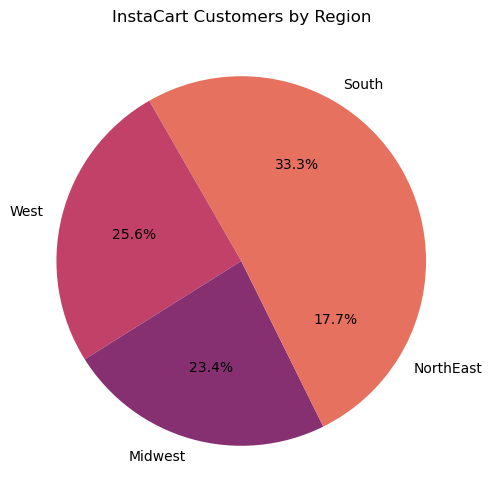

In [216]:
# Create a pie chart to visualize the distribution of customers by region
region_pie = df_merged['Region'].value_counts().plot.pie(figsize = (8,6), 
                                                               colors = sns.color_palette('flare', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title ('InstaCart Customers by Region')

plt.show()


In [217]:
# Export pie as an image
region_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_pie.png'))

#### 2. Ordering habit based on customer's region

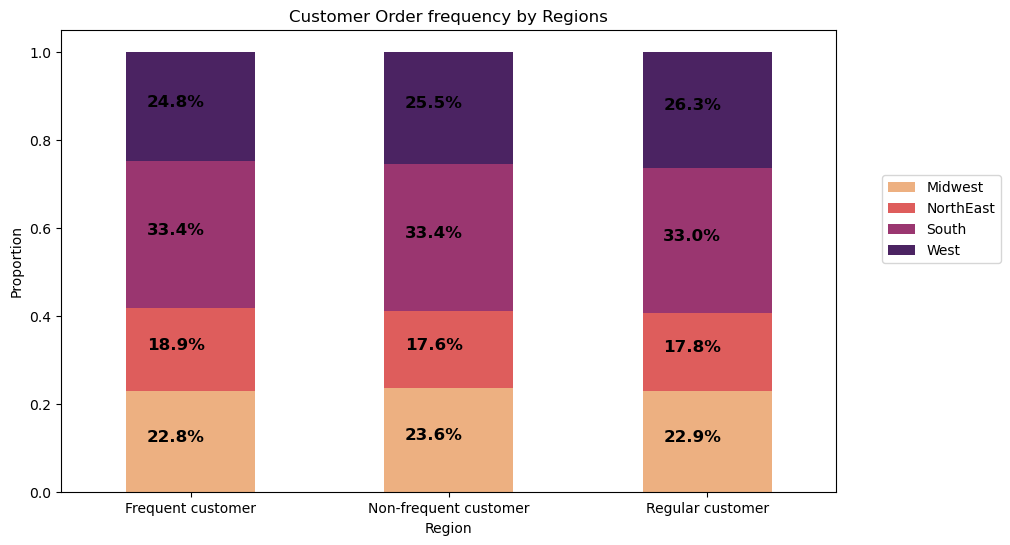

In [218]:
#Use crosstab to determine a difference in ordering habits by regions
crosstab4=pd.crosstab(index = df_merged['order_frequency'], columns = df_merged['Region'], normalize = 'index')

# Create a label of a crosstab to use in creation of a stacked bar
label_frequency_region = pd.crosstab(index = df_merged['order_frequency'], columns = df_merged['Region'])


# Create a stacked bar chart
df_frequency_by_region = crosstab4.plot(kind='bar', 
                               stacked=True,
                               colormap = 'flare',
                               title='Customer Order frequency by Regions',
                               figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 0.7),loc='upper left')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation = 0, fontsize=10)

for n, x in enumerate([*label_frequency_region.index.values]):
    for (proportion, y_loc) in zip(crosstab4.loc[x],
                                   crosstab4.loc[x].cumsum()):
                
                 plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color='black',
                 fontsize=12,
                fontweight= 'bold')

plt.show()


In [219]:
# Export chart as an image
df_frequency_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_region.png'))

#### 3. Connection between ordering habits and loyalty

In [224]:
# Use crosstab to determine ordering habits based on a customer’s loyalty status
crosstab5=pd.crosstab(index = df_merged['order_day_of_week'], columns = df_merged['loyalty_flag'])

label_crosstab5 = pd.crosstab(index = df_merged['order_day_of_week'], columns = df_merged['loyalty_flag'])


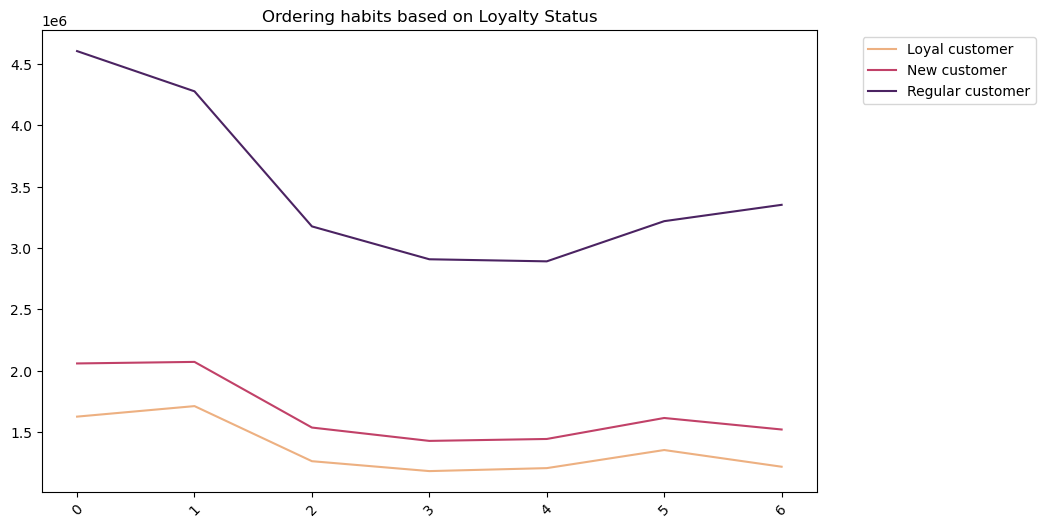

In [225]:
# Create a bar chart age profile and spending habit
line_chart_age_spending = crosstab5.abs().plot(kind='line',
                                              stacked= 'True',
                                colormap = 'flare',
                                title='Ordering habits based on Loyalty Status',
                               figsize=(10, 6))     
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left'),
plt.xticks( rotation=45)
plt.xlabel('')
plt.ylabel('')

plt.show()

In [226]:
# Export bar as an image
line_chart_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_prof_spend_habit.png'))

#### 4. Connection between marriage status and ordering habits

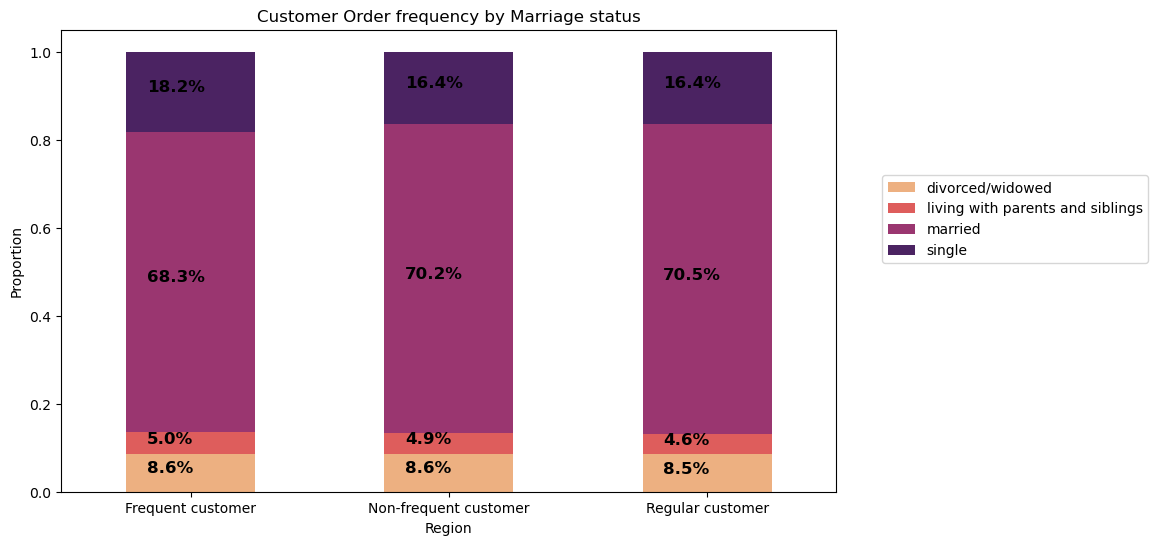

In [227]:
#Use crosstab to determine a difference in ordering habits by marriage status
crosstab6=pd.crosstab(index = df_merged['order_frequency'], columns = df_merged['Marriage_status'], normalize = 'index')

# Create a label of a crosstab to use in creation of a stacked bar
label_frequency_marriage = pd.crosstab(index = df_merged['order_frequency'], columns = df_merged['Marriage_status'])


# Create a stacked bar chart
df_frequency_by_marriage = crosstab6.plot(kind='bar', 
                               stacked=True,
                               colormap = 'flare',
                               title='Customer Order frequency by Marriage status',
                               figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 0.7),loc='upper left')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation = 0, fontsize=10)

for n, x in enumerate([*label_frequency_marriage.index.values]):
    for (proportion, y_loc) in zip(crosstab6.loc[x],
                                   crosstab6.loc[x].cumsum()):
                
                 plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color='black',
                 fontsize=12,
                fontweight= 'bold')

plt.show()


In [228]:
# Export bar as an image
df_frequency_by_marriage.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_msrriage_status_cross.png'))

#### 5. Classification based on age, income, family status

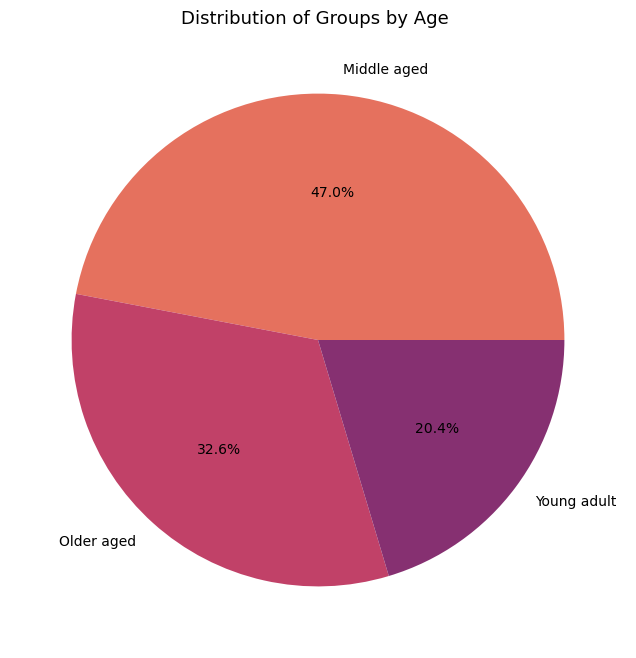

In [233]:
# Create a pie chart to visualize the distribution of age groups

pie_age_group = df_merged['Age_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('flare', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Groups by Age ', fontsize = 13)
plt.show()

In [234]:
# Export pie as an image
pie_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_age_group.png'))

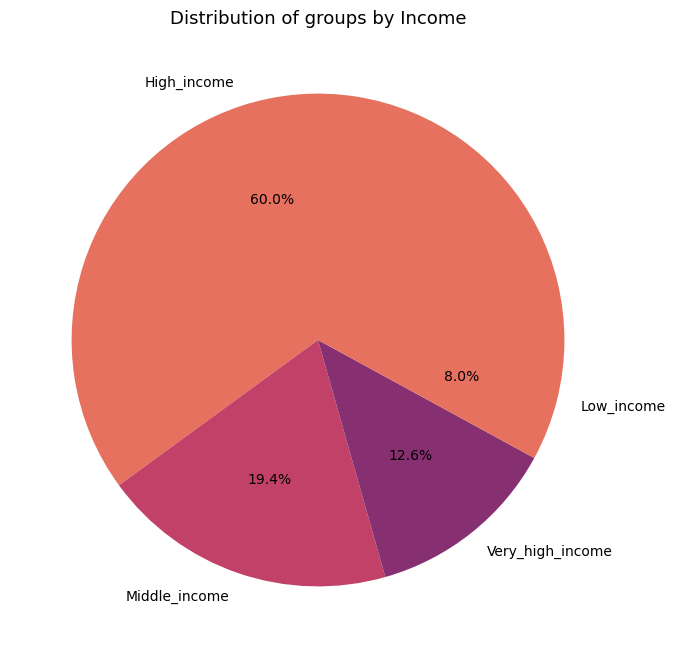

In [235]:
# Create a pie chart to visualize the distribution of groups by income 

pie_income_group = df_merged['Income_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('flare', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of groups by Income', fontsize = 13)
plt.show()

In [236]:
# Export pie as an image
pie_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income_group.png'))

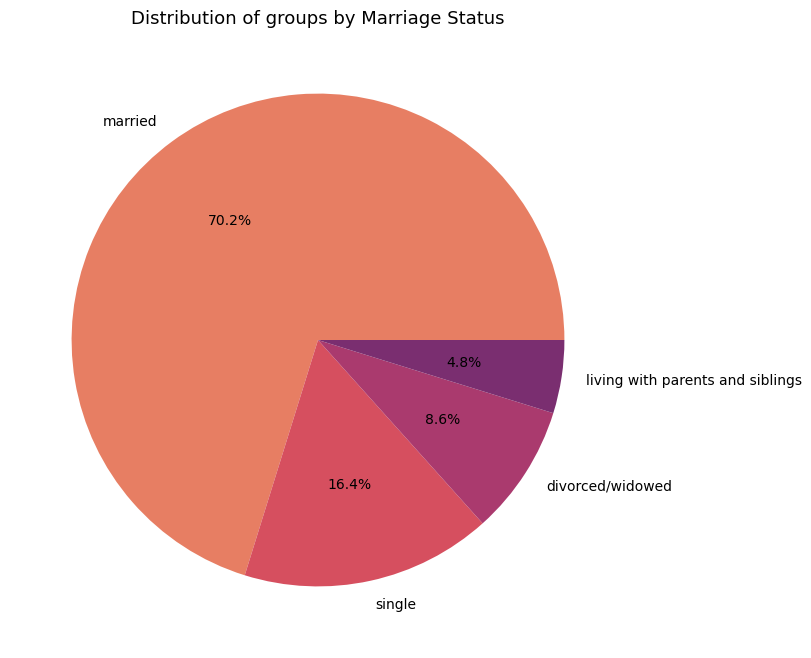

In [237]:
# Create a pie chart to visualize the distribution of family status

pie_status = df_merged['Marriage_status'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('flare', 4), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of groups by Marriage Status', fontsize = 13)
plt.show()

In [238]:
# Export pie as an image
pie_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_marital_status_group.png'))

## 9.2 Other insights

### Creating bar to compare single, married, divorced/widowed, living with others shopping habits

In [241]:
# Use crosstab to determine a difference in marriage status and spendign habit
crosstab6=pd.crosstab(index = df_merged['Marriage_status'], columns = df_merged['spending_habit'])

label_crosstab4 = pd.crosstab(index = df_merged['Marriage_status'], columns = df_merged['spending_habit'])

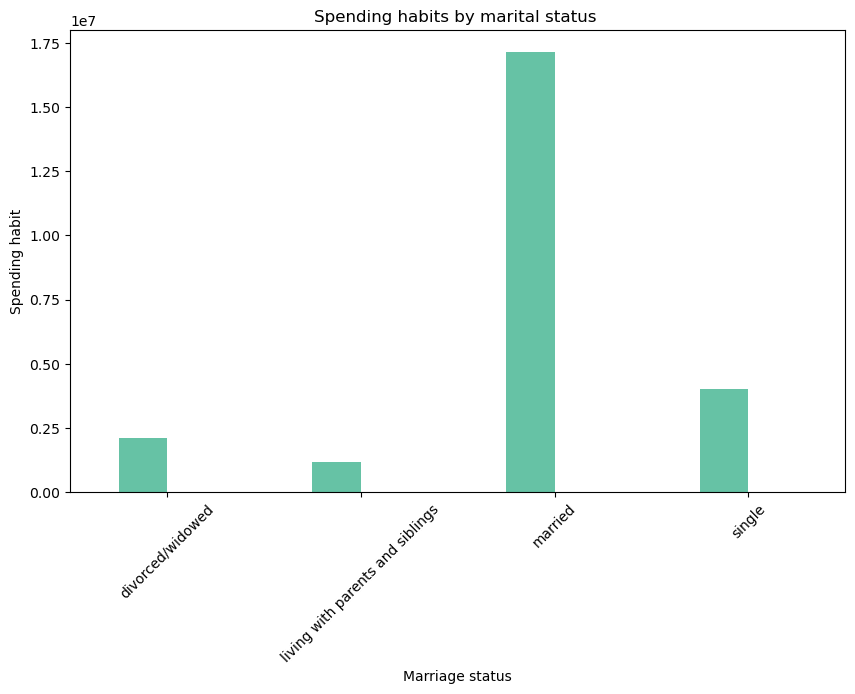

In [242]:
# Create a bar chart
bar_chart = crosstab6.abs().plot(kind='bar',
                                colormap = 'Set2',
                                title='Spending habits by marital status ',
                                 legend=False,
                               figsize=(10, 6))     
plt.xticks(rotation=45, horizontalalignment="center")
plt.xlabel("Marriage status")
plt.ylabel("Spending habit")
plt.show()

In [243]:
# Export stacked bar as an image
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_spending_habit.png'))

#### Sales by department

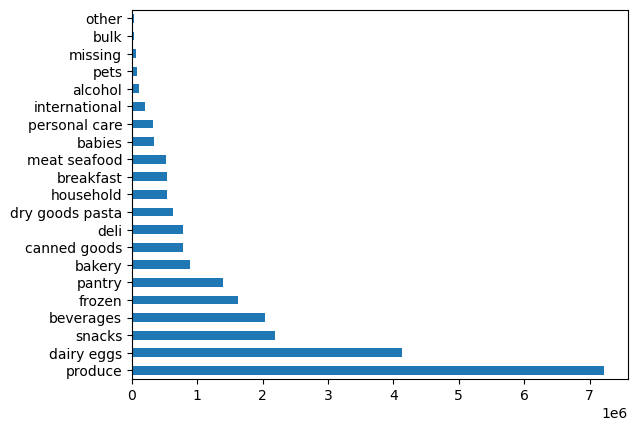

In [244]:
# Creating bar chartfor sales by department to have an overall picture of sales
bar = df_merged['department'].value_counts().plot.barh()

In [245]:
# Export bar as an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_by_departments.png'))

#### Department sales by regions

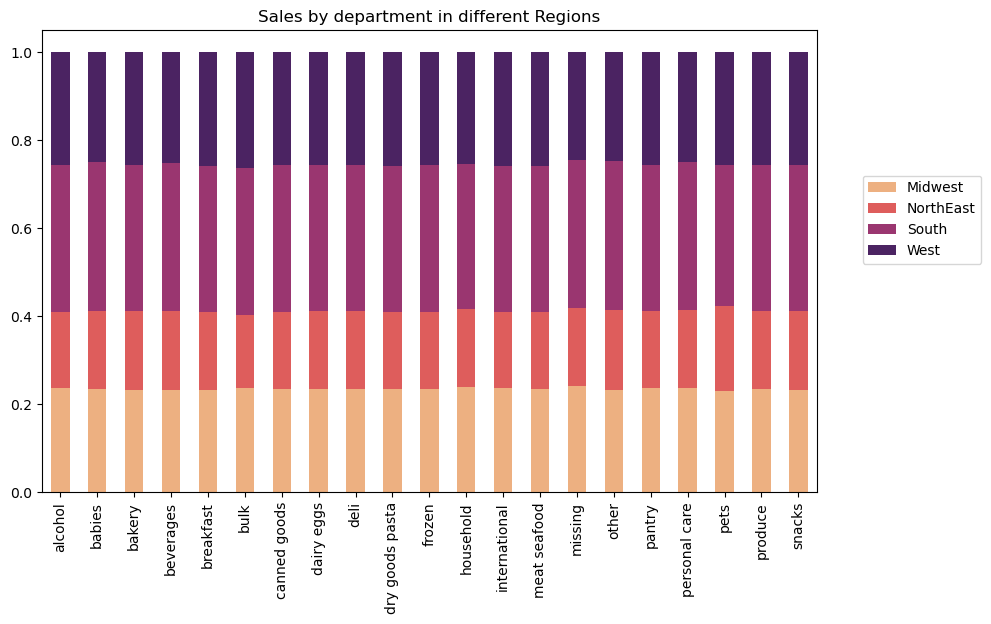

In [246]:
# Use crosstab to determine a difference in spending habits by having dependants and not having dependants
crosstab7= pd.crosstab(index = df_merged['department'], columns = df_merged['Region'], normalize = 'index' )
crosstab7

label_dep = pd.crosstab(index = df_merged['department'], columns = df_merged['Region'])

# create data
region_bar = crosstab7.abs().plot(kind='bar',
                                   stacked=True,
                               colormap = 'flare',
                               figsize=(10, 6))
plt.title('Sales by department in different Regions')
plt.legend(bbox_to_anchor=(1.05, 0.7),loc='upper left')
plt.xlabel('')
plt.ylabel('')
plt.show()



In [248]:
# Export bar as an image
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_sales_by_region.png'))

#### Creating chart spending habit by age and departments

In [250]:
# Use crosstab to determine a difference in spending habits by age
crosstab8= pd.crosstab(index = df_merged['department'], columns = df_merged['Age_profile'], normalize = 'index')
label_age = pd.crosstab(index = df_merged['department'], columns = df_merged['Age_profile'])

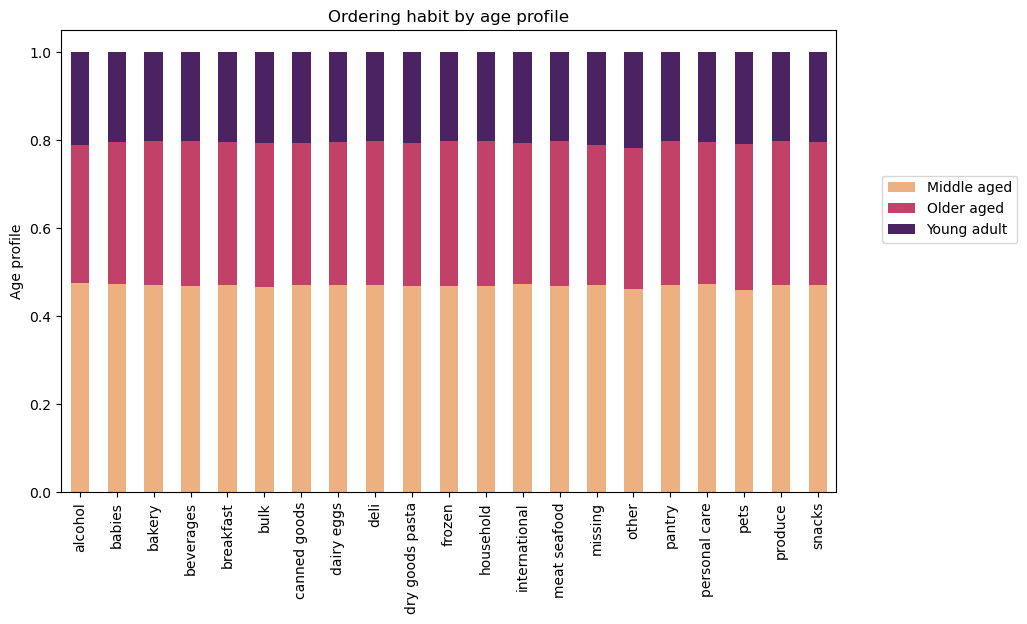

In [251]:
# create bar
age_spending_bar = crosstab8.abs().plot(kind='bar', 
                                stacked=True,        
                                colormap = 'flare',
                                figsize=(10, 6))
plt.title('Ordering habit by age profile')
plt.legend(bbox_to_anchor=(1.05, 0.7),loc='upper left')
plt.xlabel('')
plt.ylabel('Age profile')

plt.show()


In [252]:
# Export bar as an image
depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'habit_age.png'))

#### Order frequency by Loyalty 

In [253]:
# Creating bar chart to determine if loyal customers order more frequent than others
order_freq_by_loyalty = pd.crosstab(index=df_merged['loyalty_flag'],
                             columns=df_merged['order_frequency'], normalize = 'index')

In [254]:
label_loyal_freq =  pd.crosstab(index=df_merged['loyalty_flag'],
                             columns=df_merged['order_frequency'])

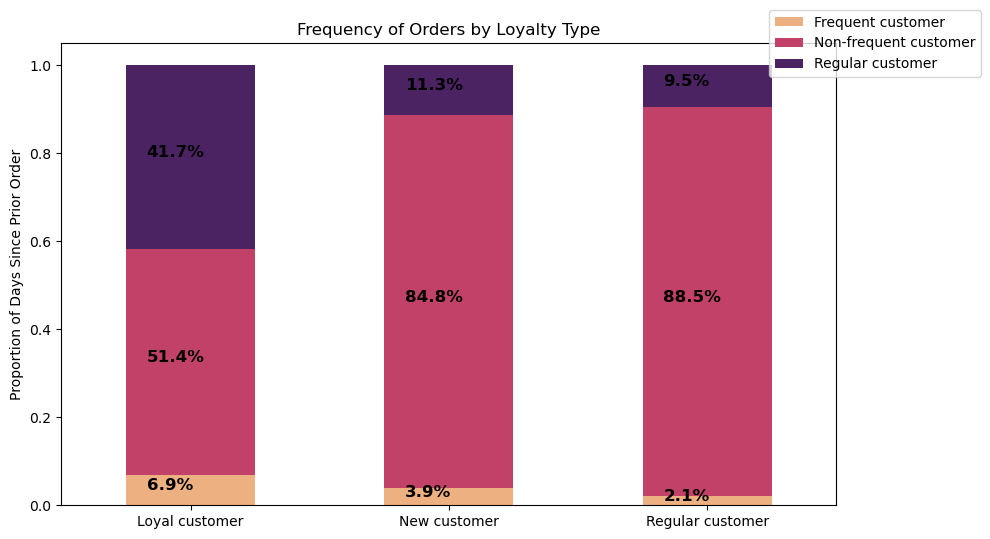

In [255]:
loyal_frequency = order_freq_by_loyalty.plot(kind='bar', 
                            stacked=True, 
                            colormap='flare', 
                            figsize=(10, 6))

plt.title('Frequency of Orders by Loyalty Type')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center')
plt.xlabel("")
plt.ylabel("Proportion of Days Since Prior Order")
plt.xticks(rotation = 0, fontsize=10)

for n, x in enumerate([*label_loyal_freq.index.values]):
    for (proportion, y_loc) in zip(order_freq_by_loyalty.loc[x],
                                   order_freq_by_loyalty.loc[x].cumsum()):
                
                 plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color='black',
                 fontsize=12,
                fontweight= 'bold')

plt.show()

In [256]:
# Export bar as an image
loyal_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_frequent_customers.png'))

#### Order frequency by Region

In [258]:
region_freq_ord = pd.crosstab(index=df_merged['order_frequency'],
                             columns=df_merged['Region'],
                             normalize="index")

label_region_freq_ord = pd.crosstab(index=df_merged['order_frequency'],
                             columns=df_merged['Region'])

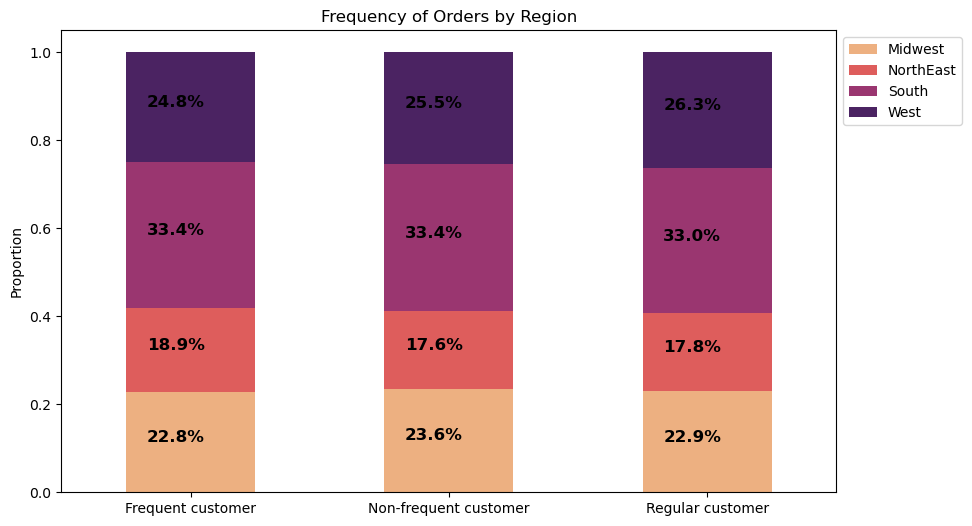

In [259]:
# Now, we create a stacked bar chart

frequency_by_region= region_freq_ord.plot(kind='bar', 
                             stacked = True,
                            colormap='flare', 
                            figsize=(10, 6))

plt.title('Frequency of Orders by Region')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xlabel('')
plt.ylabel('Proportion')
plt.xticks(rotation = 0, fontsize=10)

for n, x in enumerate([*label_region_freq_ord.index.values]):
    for (proportion, y_loc) in zip(region_freq_ord.loc[x],
                                   region_freq_ord.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color='black',
                 fontsize=12,
                 fontweight='bold')
plt.show()

In [260]:
# Export bar as an image
frequency_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_region.png'))

## Comparing sales by departments based on family status

In [269]:
# compare the customer profiles per department
dep_sales_by_status = pd.crosstab(index=df_merged['department'],
                             columns=df_merged['Customer_profile'])

Text(0, 0.5, '')

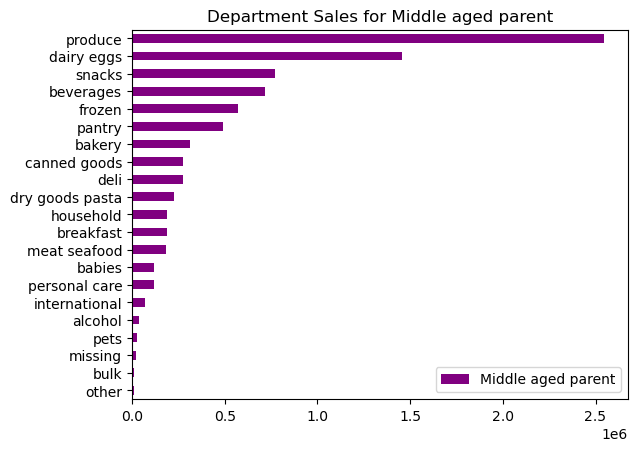

In [271]:
# Bar chart for department sales for middle aged parents

bar_mid_parent = dep_sales_by_status.sort_values(['Middle aged parent']).plot.barh(y='Middle aged parent', 
                                                                             color='Purple').legend(loc='lower right')
plt.title('Department Sales for Middle aged parent',fontsize=12)
plt.xlabel('')
plt.ylabel('')

In [272]:
# Export bar as an image
bar_mid_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_mid_parent.png'))

Text(0, 0.5, '')

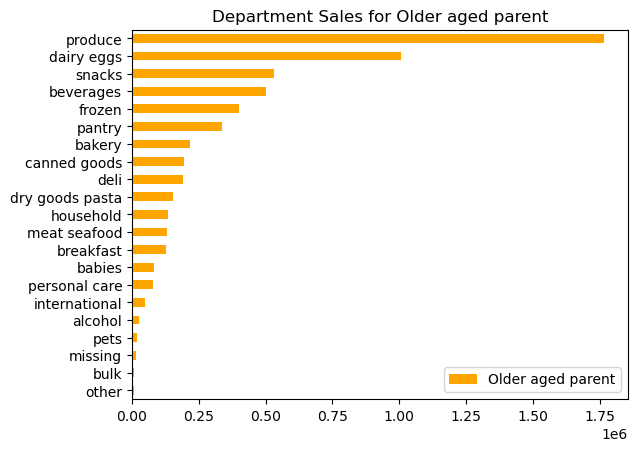

In [273]:
# Bar chart for department sales for older aged parents

bar_old_parent = dep_sales_by_status.sort_values(['Older aged parent']).plot.barh(y='Older aged parent', 
                                                                             color='Orange').legend(loc='lower right')
plt.title('Department Sales for Older aged parent',fontsize=12)
plt.xlabel('')
plt.ylabel('')

In [274]:
# Export bar as an image
bar_old_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_old_parent.png'))

Text(0, 0.5, '')

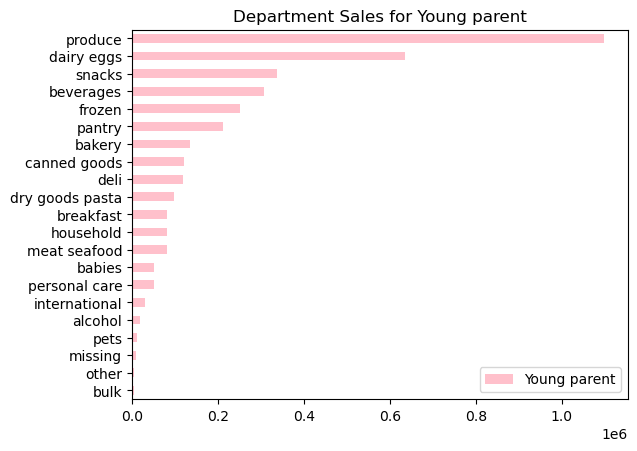

In [278]:
# Bar chart for department sales for young parents

bar_young_parent = dep_sales_by_status.sort_values(['Young parent']).plot.barh(y='Young parent', 
                                                                             color='Pink').legend(loc='lower right')
plt.title('Department Sales for Young parent',fontsize=12)
plt.xlabel('')
plt.ylabel('')

In [279]:
# Export bar as an image
bar_young_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_young_parent.png'))

Text(0, 0.5, '')

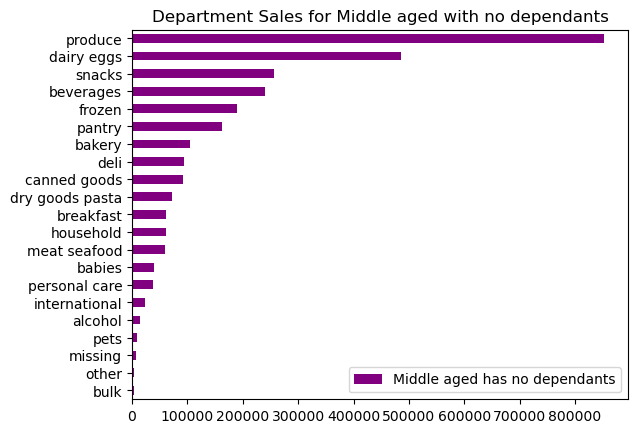

In [282]:
# Bar chart for department sales for middle aged with no dependants

bar_mid_no_dep = dep_sales_by_status.sort_values(['Middle aged has no dependants']).plot.barh(y='Middle aged has no dependants', 
                                                                             color='Purple').legend(loc='lower right')
plt.title('Department Sales for Middle aged with no dependants',fontsize=12)
plt.xlabel('')
plt.ylabel('')

In [283]:
# Export bar as an image
bar_mid_no_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_mid_no_dep.png'))

Text(0, 0.5, '')

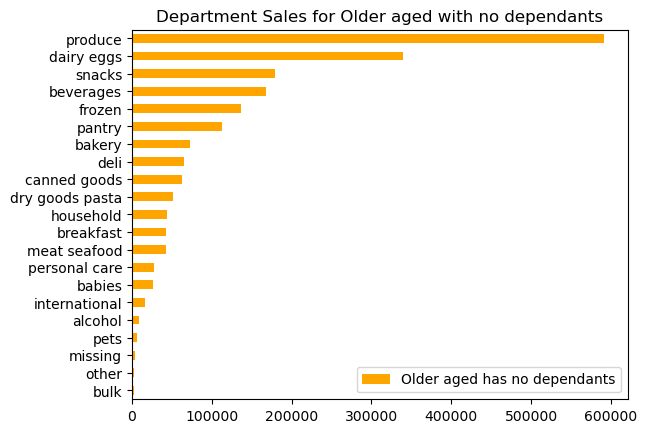

In [284]:
# Bar chart for department sales for older aged with no dependants

bar_old_no_dep = dep_sales_by_status.sort_values(['Older aged has no dependants']).plot.barh(y='Older aged has no dependants', 
                                                                             color='Orange').legend(loc='lower right')
plt.title('Department Sales for Older aged with no dependants',fontsize=12)
plt.xlabel('')
plt.ylabel('')

In [285]:
# Export bar as an image
bar_old_no_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_old_no_dep.png'))

Text(0, 0.5, '')

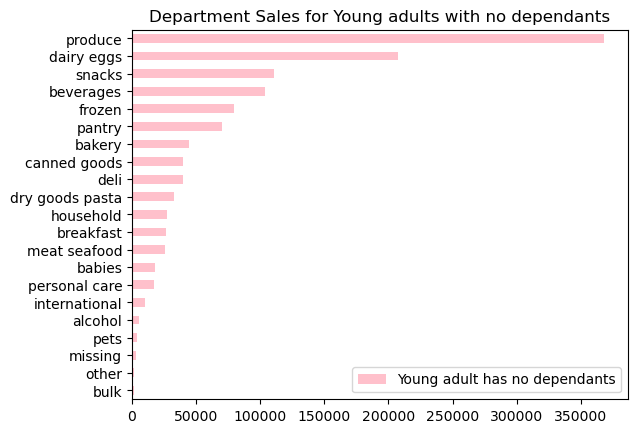

In [286]:
# Bar chart for department sales for older aged with no dependants

bar_young_no_dep = dep_sales_by_status.sort_values(['Young adult has no dependants']).plot.barh(y='Young adult has no dependants', 
                                                                             color='Pink').legend(loc='lower right')
plt.title('Department Sales for Young adults with no dependants',fontsize=12)
plt.xlabel('')
plt.ylabel('')

In [287]:
# Export bar as an image
bar_young_no_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_young_no_dep.png'))

In [290]:
# Export df to prepared data folder
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_final_data.pkl'))